In [16]:
# Use PYTHON 3.9.7 (under PyVisa environment)
import pyvisa
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline
figure(figsize=(18, 16), dpi=80)

<Figure size 1440x1280 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [17]:
rm=pyvisa.ResourceManager()
print(rm)

Resource Manager of Visa Library at /Library/Frameworks/visa.framework/visa


In [18]:
## THIS DOES NOT WORK ON MY OSX MACHINE... IT ALWAYS RETURN AN EMPTY LIST 
# res=rm.list_resources()
# print(type(res), ' --> ', res)

# SO INSTEAD, GET IP ADDRESS OF SCOPE (VIA SCOPE CONTROLS) AND PASTE IT DOWN HERE 
# Utility -> IO -> LAN -> VISA address
scope_address = 'TCPIP::192.168.0.29::INSTR'
rigol = rm.open_resource(scope_address)

In [19]:
# SANITY CHECK, TO VERIFY A SUCCESSFUL CONNECTION
# WE SHOULD BE GETTING CORRECT VALUES BACK FROM THE SCOPE
print('Device Name: ', rigol.query('*IDN?'))
print('IP Address: ', rigol.query('LAN:IPAD?'))
print('MAC Address: ', rigol.query('LAN:MAC?'))
print('DNS: ', rigol.query('LAN:DNS?'))

Device Name:  RIGOL TECHNOLOGIES,MSO5074,MS5A220200070,00.01.03.00.03

IP Address:  192.168.0.29

MAC Address:  00:19:AF:7B:18:D8

DNS:  8.8.8.8



In [24]:
# autoscale display on screen
# rigol.write('autoscale')

set_freq = 87654    # Hertz
rigol.write('1:frequency '+ str(set_freq))  # freq
rigol.write('1:apply:sin')  #sine
rigol.write('autoscale')    #autoscale
rigol.write('1:output ON')  #turn on G1 function gen

# delay here so the next command below doesn't time out
time.sleep(3) # sec delay

# measure channel 1 
rigol.write('measure:source chan1')
rigol.write('measure:item freq,channel1')
freq = rigol.query('measure:item? freq,channel1')
print('Freq (Hz): ', freq)

# delay here so the command below doesn't time out
time.sleep(2) # sec delay

# display counter on screen
rigol.write('counter:enable ON')
rigol.write('counter:source channel1')

# adjust waveform display on screen
rigol.write('system:key:decrease hscale,1')

Freq (Hz):  8.8676E+04



30

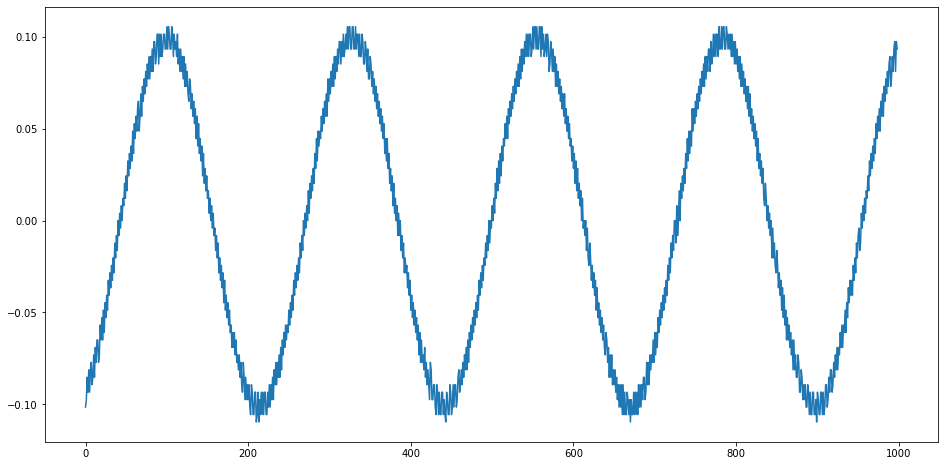

In [21]:
# get waveform data values
rigol.write('waveform:source channel1')
rigol.write('waveform:mode normal')
rigol.write('waveform:format ascii')
rigol.write('waveform:points 1000')   # number of sample points
data=rigol.query('waveform:data?')   # send query 
wave_dataset = data.split(',')       # split the commas, to convert into a list
wave_dataset.pop(0)                  # first item [0] contains TMC header
wave_dataset.pop(-1)               # contains carriage return
wave_dataset_float = [float(item) for item in wave_dataset]   # convert to float so we can plot it correctly

# plot it
plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(wave_dataset_float)
plt.show()

In [35]:
print('Device Name: ', rigol.query('*IDN?'))
print('IP Address: ', rigol.query('LAN:IPAD?'))
print('MAC Address: ', rigol.query('LAN:MAC?'))
print('DNS: ', rigol.query('LAN:DNS?'))

Device Name:  RIGOL TECHNOLOGIES,MSO5074,MS5A220200070,00.01.03.00.03

IP Address:  192.168.0.29

MAC Address:  00:19:AF:7B:18:D8

DNS:  8.8.8.8



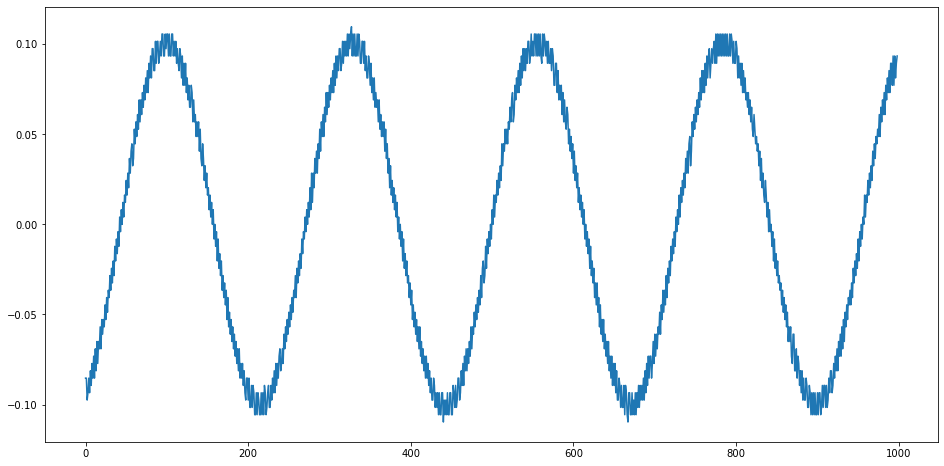

In [22]:
# get waveform data values
rigol.write('waveform:source channel1')
rigol.write('waveform:mode normal')
rigol.write('waveform:format ascii')
rigol.write('waveform:points 1000')   # sample 500 points
data=rigol.query('waveform:data?')   # send query 
wave_dataset = data.split(',')       # split the commas, to convert into a list
wave_dataset.pop(0)                  # first item [0] contains TMC header
wave_dataset.pop(-1)                 # contains carriage return
# print(wave_dataset)

wave_dataset_float = [float(item) for item in wave_dataset]
# print(wave_dataset_float)
# for wave_data in wave_dataset_float:
#   print(wave_data)                 # print each value into it's own line

# plot it
plt.rcParams["figure.figsize"] = (16, 8)
plt.plot(wave_dataset_float)
plt.show()

In [25]:
rigol.write('autoscale')
# adjust waveform display on screen
rigol.write('system:key:decrease hscale,1')

30

In [32]:
# rigol.write('BODEPLOT:ENABLE ON')

20

In [ ]:
# rigol.write('bodeplot:stop 500')

In [ ]:
# rigol.write('BODEPLOT:ENABLE OFF')

In [ ]:
#get voltage of bodeplot
# rigol.write('bodeplot:voltage?F100HZ')

In [13]:
rigol.write('channel4:display OFF')

22

In [11]:
rigol.write('counter:enable ON')

19

In [ ]:
rigol.write('counter:source channel1')

In [77]:
# SCRIPT FOR AUDIO COMPRESSOR DATA PLOT 
# Author: @owel.codes
# Date: 5.20.22

import numpy as np
# Use PYTHON 3.9.7 (under PyVisa environment)
import pyvisa
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline
figure(figsize=(18, 16), dpi=80)

rm=pyvisa.ResourceManager()
# GET IP ADDRESS OF SCOPE (VIA SCOPE CONTROLS) AND PASTE IT DOWN HERE 
# Utility -> IO -> LAN -> VISA address
scope_address = 'TCPIP::192.168.0.29::INSTR'
rigol = rm.open_resource(scope_address)

# SANITY CHECK, TO VERIFY A SUCCESSFUL CONNECTION
# WE SHOULD BE GETTING CORRECT VALUES BACK FROM THE SCOPE
print('Device Name: ', rigol.query('*IDN?'))
print('IP Address: ', rigol.query('LAN:IPAD?'))
print('MAC Address: ', rigol.query('LAN:MAC?'))
print('DNS: ', rigol.query('LAN:DNS?'))

set_freq = 1000    # Hertz
volts_increment = 0.50
volts_start = 0
volts_end = 5

ch1_dataset = []
ch2_dataset = []

print ("Running Tests from %0.2f Volts to %0.2f Volts in %0.2f Volts increment"%(volts_start, volts_end, volts_increment))
print("-----------------------------------------------------------------------")
for sample_volts in np.arange(volts_start, volts_end, volts_increment): 
    rigol.write('1:frequency '+ str(set_freq))  # freq
    rigol.write('1:apply:sin')  #sine
    rigol.write('1:output ON')  #turn on G1 function gen
    rigol.write('1:volt ' + str(sample_volts))    # set Volts output

    # make waveform pretty on display
    rigol.write('autoscale')    #autoscale
    rigol.write('system:key:decrease hscale,1')
    # delay here so the next command below doesn't time out
    time.sleep(4) # sec delay

    # set bandwidth limit on CH1 and CH2
    rigol.write('channel1:bwlimit 20M')
    rigol.write('channel2:bwlimit 20M')

    # measure channel 1 Vpp 
    rigol.write('measure:source chan1')
    rigol.write('measure:item VPP,channel1')
    ch1Vpp = rigol.query('measure:item? VPP,channel1')
    ch1_dataset.append(float(ch1Vpp))  # store voltage reading
    print("CH1: %0.2f Vpp"%(float(ch1Vpp)))

    # measure channel 2 Vpp
    rigol.write('measure:source chan2')
    rigol.write('measure:item VPP,channel2')
    ch2Vpp = rigol.query('measure:item? VPP,channel2')
    ch2_dataset.append(float(ch2Vpp)-(sample_volts*0.5))  # store voltage reading
    print("CH2: %0.2f Vpp"%(float(ch2Vpp)))
    
    print(" ")   

# plot the gathered data     
plt.rcParams["figure.figsize"] = (10, 8)
plt.plot( ch1_dataset, ch2_dataset, label="input", linestyle="-.")
plt.plot( ch2_dataset, ch1_dataset, label="output", linestyle="--")
plt.legend()
plt.show()



Device Name:  RIGOL TECHNOLOGIES,MSO5074,MS5A220200070,00.01.03.00.03

IP Address:  192.168.0.29

MAC Address:  00:19:AF:7B:18:D8

DNS:  8.8.8.8

Running Tests from 0.00 Volts to 5.00 Volts in 0.50 Volts increment
-----------------------------------------------------------------------
CH1: 0.02 Vpp
CH2: 0.11 Vpp
 
CH1: 0.54 Vpp
CH2: 2.60 Vpp
 
CH1: 1.10 Vpp
CH2: 5.21 Vpp
 
CH1: 1.58 Vpp
CH2: 7.76 Vpp
 
CH1: 2.13 Vpp
CH2: 10.62 Vpp
 
CH1: 2.61 Vpp
CH2: 12.87 Vpp
 
CH1: 3.13 Vpp
CH2: 15.53 Vpp
 
CH1: 3.65 Vpp
CH2: 17.98 Vpp
 
CH1: 4.26 Vpp
CH2: 20.83 Vpp
 
CH1: 4.82 Vpp
CH2: 23.24 Vpp
 


<Figure size 1440x1280 with 0 Axes>